[Reddit](https://www.reddit.com/r/Python/comments/7rppky/learn_how_to_create_a_neural_network_that/) 에서 흥미로운 글을 봤어요. 인공신경망을 이용해서 당뇨를 예측하는 튜토리얼이었죠. **파이썬**을 이용해서 **15줄**의 코드가 전부였습니다.  

# 기계학습이라고?

2016년도 이세돌을 이겼던 **AlphaGO**를 기억하시나요? AlphaGO라는 인공지능을 바로 기계학습으로 만들었습니다. 

> 기계 학습 또는 머신 러닝(영어: machine learning)은 인공 지능의 한 분야로, 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야를 말한다. 가령, 기계 학습을 통해서 수신한 이메일이 스팸인지 아닌지를 구분할 수 있도록 훈련할 수 있다.    - wikipedia

모든 경우의 수를 사람이 코딩할 필요가 없이 최소한의 것만 해주면, 인공 지능이 알아서 한다. 그것이 기계학습의 매력이죠. 기계학습에도 여러 종류가 있습니다. 우리가 이번에 사용할 것은 인공 신경망이라는 것입니다.

## 인공신경망
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)

> 인공신경망(artificial neural network, ANN)은 기계학습과 인지과학에서 생물학의 신경망(동물의 중추신경계중 특히 뇌)에서 영감을 얻은 통계학적 학습 알고리즘이다. - wikipedia

어떻게 인공신경망을 만드냐고요? 파이썬에는 이미 기계학습에 사용되는 프레임워크(예를 들면 *TensorFlow*)가 존재해서, 우리는 그냥 쓰기만 하면되요!

# Keras를 사용할 거에요.

![keras](https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png)

> Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Keras는 다음과 같은 특징이 있습니다. 

- 쉽게 그리고 빠르게 코딩이 가능
- CPU 와 GPU 자원을 문제없이 사용
- 파이썬 2.7 - 3.6을 지원

자세한 내용은 [공식 사이트](Keras.io.)를 방문하세요.


# 데이터 세트 설명

사용한 데이터 세트는 **Pima Indians Diabetes Data Set** 입니다. 출처는 [링크](http://rexa.info/paper/04587c10a7c92baa01948f71f2513d5928fe8e81)를 확인하세요.  

미국 원주민 중 *Pima* 족은 원래는 당뇨병의 유병율이 적었는데, 서구식 식습관에 의해 급속도로 당뇨병에 걸렸습니다. 그래서 당뇨병을 연구하는데 귀중한 데이터로 사용되고 있습니다. 

데이터 세트는 **CSV** 포멧이고 총 **9가지**의 속성으로 구성되어 있습니다. 

1. 임신횟수
2. 글루코스 내성(glucose tolerance)실험 후의 혈당수치 
3. 확장기 혈압(mm Hg)
4. 상완 삼두근 피부 두께 (mm)
5. 혈액내 인슐린 수치 (mu U/ml)
6. BMI(비만도) 수치 (weight in kg/(height in m)^2)
7. 당뇨병 가족력: 계산식은 데이터세트의 출처에서 확인하세요.
8. 나이 (years)
9. 당뇨병 여부 (0 or 1; 1은 발병)


## 출처

원작자의 코드를 확인하고 싶다면 다음 [링크](https://github.com/jg-fisher/diabetesNeuralNetwork)를 확인하세요.


# 이제 실습을 해봅시다.


In [1]:
# 필요한 모듈을 불러들입니다.
from keras.models import Sequential
from keras.layers import Dense
import numpy
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline 

# 데이터 세트의 URL을 설정
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
f = request.urlopen(url)

# random seed for reproducibility
numpy.random.seed(2)

# 데이터 세트를 불러옵니다. 
dataset = numpy.loadtxt(f, delimiter=",")

Using TensorFlow backend.


이걸로 데이터 세트는 준비가 되었습니다.  

## 모델 만들기

다음으로 **Keras**를 이용해 간단한 모델을 만들고, 800번의 학습(epochs)을 해보겠습니다.
800번 정도 실행시키면 시간이 좀 걸립니다. 기다려 주세요.

In [2]:
# 데이터세트를 두 가지 원인(X) 과 결과(Y)로 나누어 줍니다. 
X = dataset[:,0:8]
Y = dataset[:,8]

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) # input layer requires input_dim param
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
history = model.fit(X, Y, epochs = 800, batch_size=10)

# 모델의 정확도를 계산합니다.
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/800
768/768 [==============================] - 0s 464us/step - loss: 1.4698 - acc: 0.6432
Epoch 2/800
768/768 [==============================] - 0s 224us/step - loss: 0.6966 - acc: 0.6797
Epoch 3/800
768/768 [==============================] - 0s 206us/step - loss: 0.6424 - acc: 0.6914
Epoch 4/800
768/768 [==============================] - 0s 210us/step - loss: 0.6295 - acc: 0.6914
Epoch 5/800
768/768 [==============================] - 0s 218us/step - loss: 0.6070 - acc: 0.7188
Epoch 6/800
768/768 [==============================] - 0s 236us/step - loss: 0.6124 - acc: 0.7083
Epoch 7/800
768/768 [==============================] - 0s 221us/step - loss: 0.6104 - acc: 0.6966
Epoch 8/800
768/768 [==============================] - 0s 223us/step - loss: 0.5925 - acc: 0.7057
Epoch 9/800
768/768 [==============================] - 0s 224us/step - loss: 0.5843 - acc: 0.7005
Epoch 10/800
768/768 [==============================] - 0s 235us/step - loss: 0.5795 - acc: 0.7070
Epoch 11/800
768/76

768/768 [==============================] - 0s 232us/step - loss: 0.4512 - acc: 0.7760
Epoch 166/800
768/768 [==============================] - 0s 228us/step - loss: 0.4513 - acc: 0.7865
Epoch 167/800
768/768 [==============================] - 0s 238us/step - loss: 0.4432 - acc: 0.7852
Epoch 168/800
768/768 [==============================] - 0s 222us/step - loss: 0.4546 - acc: 0.7878
Epoch 169/800
768/768 [==============================] - 0s 220us/step - loss: 0.4534 - acc: 0.7891
Epoch 170/800
768/768 [==============================] - 0s 196us/step - loss: 0.4448 - acc: 0.7865
Epoch 171/800
768/768 [==============================] - 0s 217us/step - loss: 0.4495 - acc: 0.7956
Epoch 172/800
768/768 [==============================] - 0s 231us/step - loss: 0.4446 - acc: 0.7812
Epoch 173/800
768/768 [==============================] - 0s 227us/step - loss: 0.4414 - acc: 0.7852
Epoch 174/800
768/768 [==============================] - 0s 231us/step - loss: 0.4571 - acc: 0.7878
Epoch 175/800


768/768 [==============================] - 0s 218us/step - loss: 0.4158 - acc: 0.7982
Epoch 248/800
768/768 [==============================] - 0s 210us/step - loss: 0.4158 - acc: 0.8021
Epoch 249/800
768/768 [==============================] - 0s 176us/step - loss: 0.4127 - acc: 0.8021
Epoch 250/800
768/768 [==============================] - 0s 194us/step - loss: 0.4299 - acc: 0.7995
Epoch 251/800
768/768 [==============================] - 0s 192us/step - loss: 0.4114 - acc: 0.8164
Epoch 252/800
768/768 [==============================] - 0s 221us/step - loss: 0.4185 - acc: 0.8047
Epoch 253/800
768/768 [==============================] - 0s 209us/step - loss: 0.4224 - acc: 0.8008
Epoch 254/800
768/768 [==============================] - 0s 162us/step - loss: 0.4237 - acc: 0.8151
Epoch 255/800
768/768 [==============================] - 0s 208us/step - loss: 0.4015 - acc: 0.8255
Epoch 256/800
768/768 [==============================] - 0s 223us/step - loss: 0.4188 - acc: 0.8034
Epoch 257/800


768/768 [==============================] - 0s 230us/step - loss: 0.3853 - acc: 0.8268
Epoch 330/800
768/768 [==============================] - 0s 191us/step - loss: 0.3837 - acc: 0.8255
Epoch 331/800
768/768 [==============================] - 0s 213us/step - loss: 0.3842 - acc: 0.8255
Epoch 332/800
768/768 [==============================] - 0s 218us/step - loss: 0.4003 - acc: 0.8229
Epoch 333/800
768/768 [==============================] - 0s 203us/step - loss: 0.3777 - acc: 0.8294
Epoch 334/800
768/768 [==============================] - 0s 204us/step - loss: 0.3767 - acc: 0.8307
Epoch 335/800
768/768 [==============================] - 0s 189us/step - loss: 0.3995 - acc: 0.8190
Epoch 336/800
768/768 [==============================] - 0s 197us/step - loss: 0.3871 - acc: 0.8164
Epoch 337/800
768/768 [==============================] - 0s 179us/step - loss: 0.3836 - acc: 0.8151
Epoch 338/800
768/768 [==============================] - 0s 164us/step - loss: 0.3773 - acc: 0.8177
Epoch 339/800


768/768 [==============================] - 0s 222us/step - loss: 0.3670 - acc: 0.8268
Epoch 412/800
768/768 [==============================] - 0s 236us/step - loss: 0.3613 - acc: 0.8437
Epoch 413/800
768/768 [==============================] - 0s 236us/step - loss: 0.3638 - acc: 0.8281
Epoch 414/800
768/768 [==============================] - 0s 231us/step - loss: 0.3623 - acc: 0.8307
Epoch 415/800
768/768 [==============================] - 0s 228us/step - loss: 0.3789 - acc: 0.8229
Epoch 416/800
768/768 [==============================] - 0s 234us/step - loss: 0.3659 - acc: 0.8307
Epoch 417/800
768/768 [==============================] - 0s 227us/step - loss: 0.3548 - acc: 0.8411
Epoch 418/800
768/768 [==============================] - 0s 236us/step - loss: 0.3702 - acc: 0.8333
Epoch 419/800
768/768 [==============================] - 0s 224us/step - loss: 0.3647 - acc: 0.8346
Epoch 420/800
768/768 [==============================] - 0s 224us/step - loss: 0.3619 - acc: 0.8307
Epoch 421/800


768/768 [==============================] - 0s 214us/step - loss: 0.3568 - acc: 0.8320
Epoch 494/800
768/768 [==============================] - 0s 210us/step - loss: 0.3598 - acc: 0.8359
Epoch 495/800
768/768 [==============================] - 0s 210us/step - loss: 0.3524 - acc: 0.8464
Epoch 496/800
768/768 [==============================] - 0s 215us/step - loss: 0.3707 - acc: 0.8203
Epoch 497/800
768/768 [==============================] - 0s 184us/step - loss: 0.3489 - acc: 0.8451
Epoch 498/800
768/768 [==============================] - 0s 191us/step - loss: 0.3489 - acc: 0.8385
Epoch 499/800
768/768 [==============================] - 0s 189us/step - loss: 0.3442 - acc: 0.8424
Epoch 500/800
768/768 [==============================] - 0s 207us/step - loss: 0.3548 - acc: 0.8320
Epoch 501/800
768/768 [==============================] - 0s 217us/step - loss: 0.3445 - acc: 0.8529
Epoch 502/800
768/768 [==============================] - 0s 233us/step - loss: 0.3400 - acc: 0.8503
Epoch 503/800


768/768 [==============================] - 0s 235us/step - loss: 0.3469 - acc: 0.8424
Epoch 576/800
768/768 [==============================] - 0s 230us/step - loss: 0.3293 - acc: 0.8464
Epoch 577/800
768/768 [==============================] - 0s 223us/step - loss: 0.3143 - acc: 0.8607
Epoch 578/800
768/768 [==============================] - 0s 223us/step - loss: 0.3334 - acc: 0.8490
Epoch 579/800
768/768 [==============================] - 0s 222us/step - loss: 0.3359 - acc: 0.8437
Epoch 580/800
768/768 [==============================] - 0s 219us/step - loss: 0.3383 - acc: 0.8385
Epoch 581/800
768/768 [==============================] - 0s 229us/step - loss: 0.3274 - acc: 0.8385
Epoch 582/800
768/768 [==============================] - 0s 242us/step - loss: 0.3399 - acc: 0.8294
Epoch 583/800
768/768 [==============================] - 0s 229us/step - loss: 0.3312 - acc: 0.8437
Epoch 584/800
768/768 [==============================] - 0s 212us/step - loss: 0.3332 - acc: 0.8490
Epoch 585/800


768/768 [==============================] - 0s 214us/step - loss: 0.3256 - acc: 0.8385
Epoch 739/800
768/768 [==============================] - 0s 214us/step - loss: 0.2990 - acc: 0.8659
Epoch 740/800
768/768 [==============================] - 0s 232us/step - loss: 0.3158 - acc: 0.8398
Epoch 741/800
768/768 [==============================] - 0s 229us/step - loss: 0.3238 - acc: 0.8464
Epoch 742/800
768/768 [==============================] - 0s 240us/step - loss: 0.3022 - acc: 0.8516
Epoch 743/800
768/768 [==============================] - 0s 224us/step - loss: 0.3064 - acc: 0.8555
Epoch 744/800
768/768 [==============================] - 0s 229us/step - loss: 0.3107 - acc: 0.8490
Epoch 745/800
768/768 [==============================] - 0s 222us/step - loss: 0.3062 - acc: 0.8529
Epoch 746/800
768/768 [==============================] - 0s 222us/step - loss: 0.3186 - acc: 0.8490
Epoch 747/800
768/768 [==============================] - 0s 220us/step - loss: 0.3202 - acc: 0.8633
Epoch 748/800


우리의 모델이 학습결과 **87.24%** 라는 정확도를 가지게 되었습니다.

## 시각화하기

이제 다 끝났습니다. 다음으로는 **Keras**가 학습을 반복할 때마다 정확도가 얼마나 올라가는지 시각화를 해보겠습니다.

[Text(0,0.5,'loss'), Text(0.5,0,'epoch'), Text(0.5,1,'model loss')]

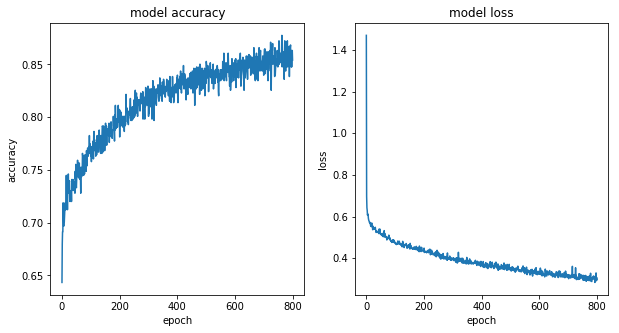

In [3]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

# 모델의 정확도를 그립니다.
ax0.plot(history.history['acc']) 
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

# 모델의 오차를 그립니다.
ax1.plot(history.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')


결과를 보니, 한 800번 정도 학습하면 꽤 정확한 모델을 얻을 수 있네요.

# 마치며,

모델을 만들었다면, 이제 모델을 유용하게 사용할 시간입니다. 가상의 환자 데이터를 만들어 그 환자가 당뇨에 걸릴 확률을 알아보겠습니다.  

`patient_1` 는

1. 임신한 적 없음
2. 글루코스 내성(glucose tolerance)실험 후의 혈당수치는 137 
3. 확장기 혈압은 90(mm Hg)
4. 상완 삼두근 피부 두께는 35(mm)
5. 혈액내 인슐린 수치는 168 (mu U/ml)
6. BMI(비만도) 수치는 43.1
7. 당뇨병 가족력은 2.288 
8. 나이 (years)는 33살

이라고 가정합니다.

In [4]:
# 가상의 환자 데이터 입력
patient_1 = numpy.array([[0,137,90,35,168,43.1,2.288,33]])

# 모델로 예측하기
prediction = model.predict(patient_1)

# 예측결과 출력하기
print(prediction*100)

[[30.039745]]


우리의 모델에 따르면, `patient_1`는 당뇨병에 걸릴 확률이 **30%** 입니다.